In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-dissolution-in-supercritical-carbon-dioxide/SCCO2 Drug Solubility Dataset1.csv


# Machine Learning Modeling and Optimization of Drug Dissolution in Supercritical Carbon dioxide (SC-CO2)

In [2]:
import pandas as pd

drugs = pd.read_csv('/kaggle/input/drug-dissolution-in-supercritical-carbon-dioxide/SCCO2 Drug Solubility Dataset1.csv')
drugs

,drug,temp,press,mw_drug,mp_drug,rho_scco2,sol,sol_mol_frac
0,Rosuvastatin,308.00,121.6,236.00,435.00,771.0,0.19000,0.000023
1,Rosuvastatin,308.00,152.0,236.00,435.00,818.0,0.24000,0.000027
2,Rosuvastatin,308.00,182.4,236.00,435.00,850.0,0.33000,0.000036
3,Rosuvastatin,308.00,212.8,236.00,435.00,876.0,0.39000,0.000041
4,Rosuvastatin,308.00,243.2,236.00,435.00,897.0,0.43000,0.000044
...,...,...,...,...,...,...,...,...
2129,Erythromycin,313.15,299.9,733.93,488.65,909.7,13.21074,0.000890
2130,Erythromycin,333.15,150.0,733.93,488.65,604.1,13.94467,0.014000
2131,Erythromycin,333.25,200.0,733.93,488.65,723.3,20.55004,0.018000
2132,Erythromycin,333.25,249.9,733.93,488.65,786.0,23.48576,0.018000


# Exploratory Data Analysis

In [3]:
#drops columns not needed
drugs = drugs.drop(['drug', 'sol'], axis=1)
drugs

,temp,press,mw_drug,mp_drug,rho_scco2,sol_mol_frac
0,308.00,121.6,236.00,435.00,771.0,0.000023
1,308.00,152.0,236.00,435.00,818.0,0.000027
2,308.00,182.4,236.00,435.00,850.0,0.000036
3,308.00,212.8,236.00,435.00,876.0,0.000041
4,308.00,243.2,236.00,435.00,897.0,0.000044
...,...,...,...,...,...,...
2129,313.15,299.9,733.93,488.65,909.7,0.000890
2130,333.15,150.0,733.93,488.65,604.1,0.014000
2131,333.25,200.0,733.93,488.65,723.3,0.018000
2132,333.25,249.9,733.93,488.65,786.0,0.018000


In [4]:
#checking data's dimenstion
drugs.shape

(2134, 6)

In [5]:
#Checking data types
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          2134 non-null   float64
 1   press         2134 non-null   float64
 2   mw_drug       2134 non-null   float64
 3   mp_drug       2134 non-null   float64
 4   rho_scco2     2134 non-null   float64
 5   sol_mol_frac  2134 non-null   float64
dtypes: float64(6)
memory usage: 100.2 KB


In [6]:
#checking statistical properties
drugs.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,2134.0,327.249063,14.279248,303.000000,318.000000,328.000000,338.00000,373.150
press,2134.0,239.008997,79.280146,80.000000,182.000000,243.000000,304.00000,500.000
mw_drug,2134.0,323.283704,141.700122,96.000000,237.000000,289.380000,384.64000,853.906
mp_drug,2134.0,406.094470,105.280469,115.000000,369.150000,431.150000,480.00000,608.150
rho_scco2,2134.0,743.578457,185.267102,3.458823,693.575000,792.000000,858.00000,992.000
sol_mol_frac,2134.0,0.000371,0.001135,0.000000,0.000011,0.000054,0.00023,0.021


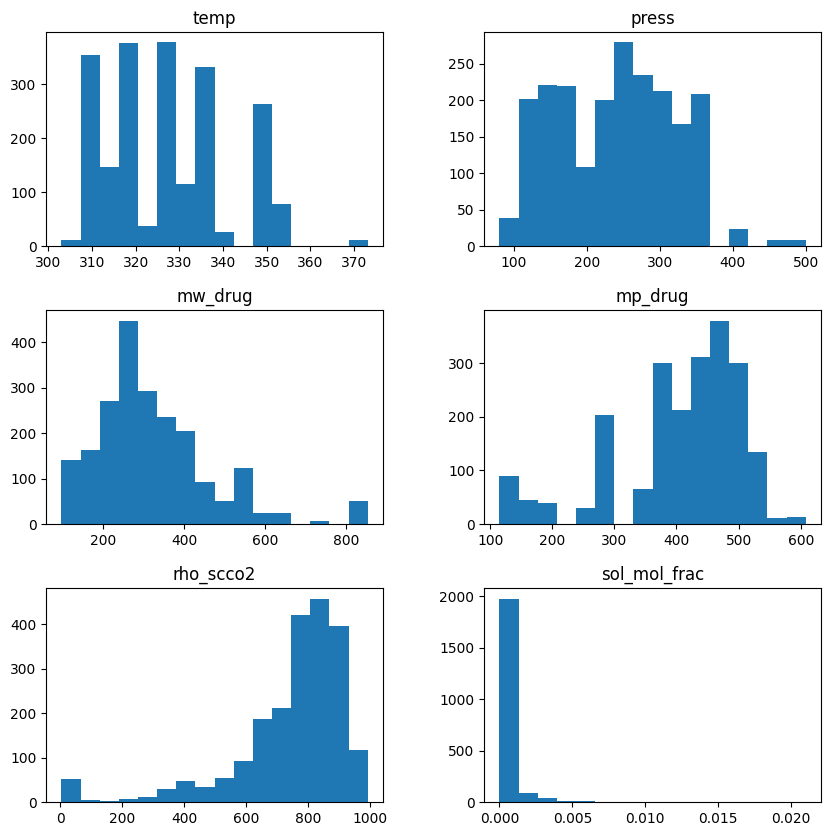

In [7]:
#Overview of variable distributtions
import matplotlib.pyplot as plt

axes = drugs.hist(figsize=(10,10), bins=16)
for ax in axes.flatten():
    ax.grid(False)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


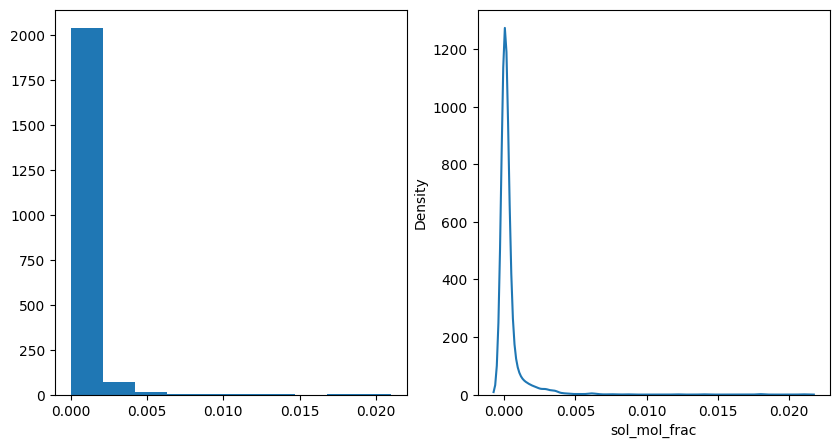

In [8]:
#Closer view at target variable distribution
import seaborn as sns

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(drugs['sol_mol_frac'])

plt.subplot(122)
sns.kdeplot(drugs['sol_mol_frac'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1200x500 with 0 Axes>

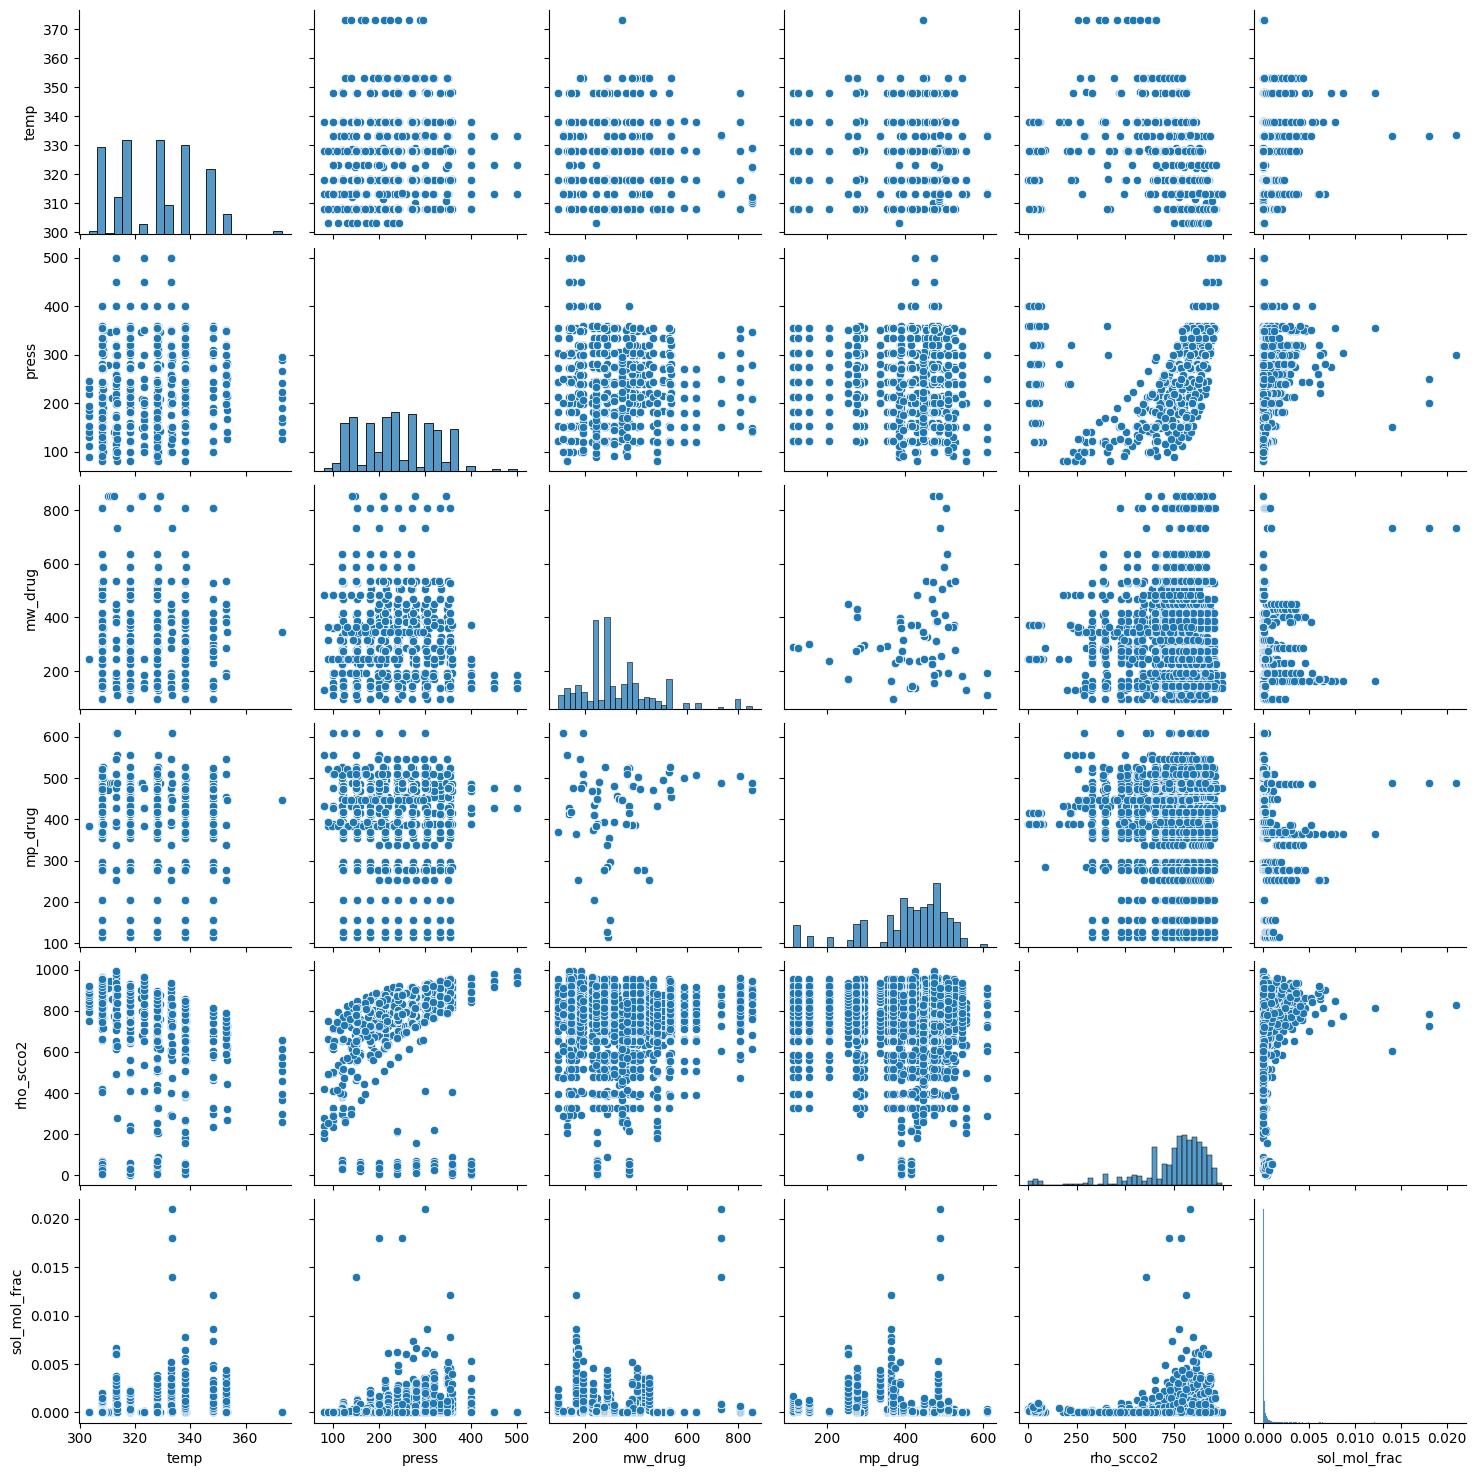

In [9]:
#Overview of general dataset correlations
plt.figure(figsize=(12,5))
sns.pairplot(drugs)
plt.show()

<Figure size 1200x500 with 0 Axes>

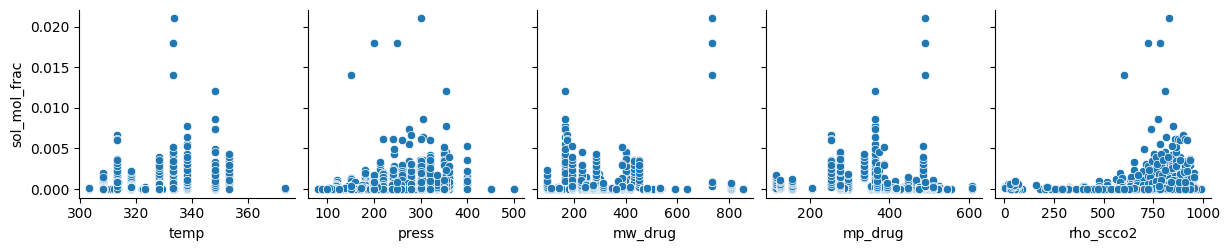

In [10]:
#Overview of Target-Features correlation
import seaborn as sns
plt.figure(figsize=(12,5))
sns.pairplot(drugs, y_vars=['sol_mol_frac'], x_vars=['temp', 'press', 'mw_drug', 'mp_drug', 'rho_scco2'])
plt.show()

## Statistical Test Analysis with No Target-Feature Correlation Null Hypothesis

In [11]:
#Overall Pearson Correlation
drugs.corr()

,temp,press,mw_drug,mp_drug,rho_scco2,sol_mol_frac
temp,1.000000,0.034274,-0.004556,-0.066843,-0.366756,0.095379
press,0.034274,1.000000,-0.050634,-0.063696,0.497761,0.165942
mw_drug,-0.004556,-0.050634,1.000000,0.216240,0.012571,0.010982
mp_drug,-0.066843,-0.063696,0.216240,1.000000,-0.014709,-0.155761
rho_scco2,-0.366756,0.497761,0.012571,-0.014709,1.000000,0.082220
sol_mol_frac,0.095379,0.165942,0.010982,-0.155761,0.082220,1.000000


In [12]:
#Overall Spearman Correlation
drugs.corr(method='spearman')

,temp,press,mw_drug,mp_drug,rho_scco2,sol_mol_frac
temp,1.000000,0.037646,0.030619,-0.065548,-0.566185,0.133392
press,0.037646,1.000000,-0.051901,-0.085455,0.665476,0.373509
mw_drug,0.030619,-0.051901,1.000000,0.223809,-0.042455,-0.148942
mp_drug,-0.065548,-0.085455,0.223809,1.000000,-0.003074,-0.427108
rho_scco2,-0.566185,0.665476,-0.042455,-0.003074,1.000000,0.154075
sol_mol_frac,0.133392,0.373509,-0.148942,-0.427108,0.154075,1.000000


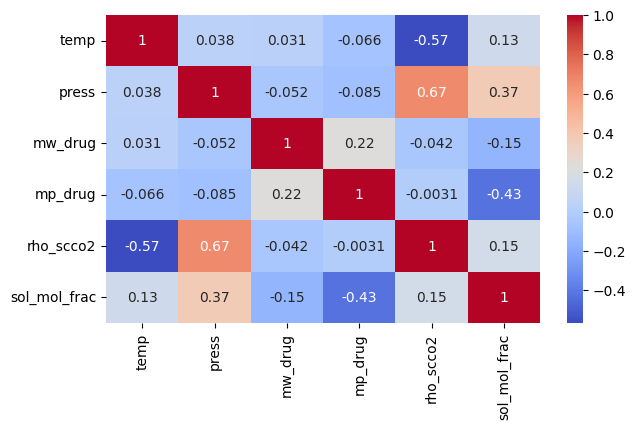

In [13]:
#Visualizing Spearman Correlation Coefficients
import seaborn as sns

plt.figure(figsize=(7,4))
sns.heatmap(drugs.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.show()

### Coefficient Correlation of Features to Target Variable

Correlation P_values
                       Pearson      Spearman       Kendall
0   Molar Weight  6.121395e-01  4.678810e-12  3.264290e-12
1  Melting Point  4.640707e-13  2.304572e-95  1.205190e-89
2  SCCO2_Density  1.433136e-04  8.299040e-13  6.309179e-13
3       Pressure  1.212079e-14  1.269197e-71  1.260231e-71
4    Temperature  1.017035e-05  6.165613e-10  1.015211e-09


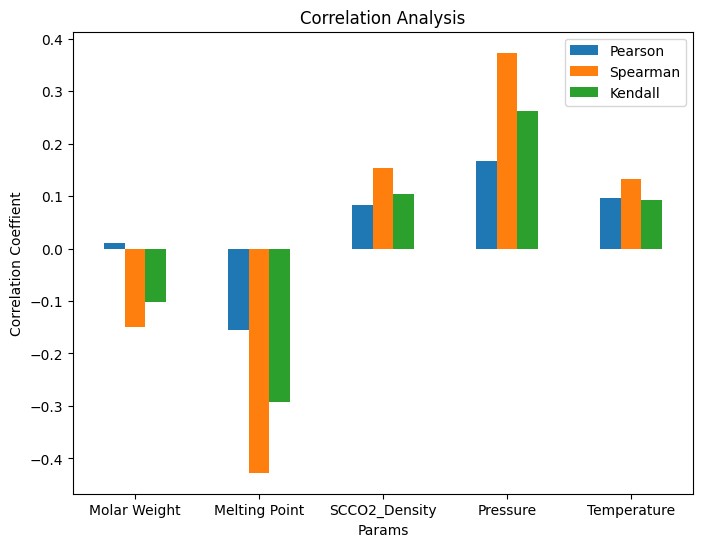

In [14]:
from scipy.stats import pearsonr,spearmanr,kendalltau

#Pearson Correlation Coefficients
MW_Solu_pear = pearsonr(drugs['mw_drug'], drugs['sol_mol_frac'])[0]
MP_Solu_pear = pearsonr(drugs['mp_drug'], drugs['sol_mol_frac'])[0]
Density_pear = pearsonr(drugs['rho_scco2'], drugs['sol_mol_frac'])[0]
Pressure_pear =  pearsonr(drugs['press'], drugs['sol_mol_frac'])[0]
Temp_pear =  pearsonr(drugs['temp'], drugs['sol_mol_frac'])[0]

#Spearman Correlation Coefficients
MW_Solu_sper = spearmanr(drugs['mw_drug'], drugs['sol_mol_frac'])[0]
MP_Solu_sper = spearmanr(drugs['mp_drug'], drugs['sol_mol_frac'])[0]
Density_sper = spearmanr(drugs['rho_scco2'], drugs['sol_mol_frac'])[0]
Pressure_sper =  spearmanr(drugs['press'], drugs['sol_mol_frac'])[0]
Temp_sper = spearmanr(drugs['temp'], drugs['sol_mol_frac'])[0]

#Kendall Correlation Coefficients
MW_Solu_kend = kendalltau(drugs['mw_drug'], drugs['sol_mol_frac'])[0]
MP_Solu_kend = kendalltau(drugs['mp_drug'], drugs['sol_mol_frac'])[0]
Density_kend = kendalltau(drugs['rho_scco2'], drugs['sol_mol_frac'])[0]
Pressure_kend =  kendalltau(drugs['press'], drugs['sol_mol_frac'])[0]
Temp_kend = kendalltau(drugs['temp'], drugs['sol_mol_frac'])[0]

#Pearson Correlation P_values
MW_Solu_ppv = pearsonr(drugs['mw_drug'], drugs['sol_mol_frac'])[1]
MP_Solu_ppv = pearsonr(drugs['mp_drug'], drugs['sol_mol_frac'])[1]
Density_ppv = pearsonr(drugs['rho_scco2'], drugs['sol_mol_frac'])[1]
Pressure_ppv =  pearsonr(drugs['press'], drugs['sol_mol_frac'])[1]
Temp_ppv =  pearsonr(drugs['temp'], drugs['sol_mol_frac'])[1]

#Spearman Correlation P_values
MW_Solu_spv = spearmanr(drugs['mw_drug'], drugs['sol_mol_frac'])[1]
MP_Solu_spv = spearmanr(drugs['mp_drug'], drugs['sol_mol_frac'])[1]
Density_spv = spearmanr(drugs['rho_scco2'], drugs['sol_mol_frac'])[1]
Pressure_spv =  spearmanr(drugs['press'], drugs['sol_mol_frac'])[1]
Temp_spv = spearmanr(drugs['temp'], drugs['sol_mol_frac'])[1]

#Kendall Correlation P_values
MW_Solu_kpv = kendalltau(drugs['mw_drug'], drugs['sol_mol_frac'])[1]
MP_Solu_kpv = kendalltau(drugs['mp_drug'], drugs['sol_mol_frac'])[1]
Density_kpv = kendalltau(drugs['rho_scco2'], drugs['sol_mol_frac'])[1]
Pressure_kpv =  kendalltau(drugs['press'], drugs['sol_mol_frac'])[1]
Temp_kpv = kendalltau(drugs['temp'], drugs['sol_mol_frac'])[1]

#Create a Dataframe for the Correlation Coefficients
df = [["Molar Weight", MW_Solu_pear, MW_Solu_sper, MW_Solu_kend],
      ["Melting Point", MP_Solu_pear, MP_Solu_sper, MP_Solu_kend],
      ["SCCO2_Density",Density_pear,Density_sper, Density_kend],
      ["Pressure", Pressure_pear,Pressure_sper, Pressure_kend],
     ["Temperature",Temp_pear,Temp_sper, Temp_kend]]
df = pd.DataFrame(df, columns=["Params", "Pearson", "Spearman", "Kendall"])

#Create a Dataframe for the Correlation P_values
df2 = [["Molar Weight", MW_Solu_ppv, MW_Solu_spv, MW_Solu_kpv],
      ["Melting Point", MP_Solu_ppv, MP_Solu_spv, MP_Solu_kpv],
       ["SCCO2_Density",Density_ppv,Density_spv, Density_kpv],
      ["Pressure", Pressure_ppv,Pressure_spv, Pressure_kpv],
     ["Temperature",Temp_ppv,Temp_spv, Temp_kpv]]
df2 = pd.DataFrame(df2, columns=[" ", "Pearson", "Spearman", "Kendall"])
print("Correlation P_values")
print(df2)

#Visualise Corr_Coeffs
df.plot(x="Params",y=["Pearson","Spearman", "Kendall"], kind="bar", figsize=(8,6))
plt.title('Correlation Analysis')
plt.ylabel("Correlation Coeffient")
plt.xticks(rotation=360)
plt.show()

# Machine Learning Modeling

**Importing necessary libraries**

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

**Data Preprocessing**

In [16]:
X = drugs.drop('sol_mol_frac', axis=1).values
y = drugs['sol_mol_frac'].values
#transforming target variable
tr = QuantileTransformer(output_distribution='normal')
y_tr = tr.fit_transform(y.reshape(-1,1)).ravel()
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_tr, test_size=0.25, random_state=42)
#Scaling features
scaler = RobustScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


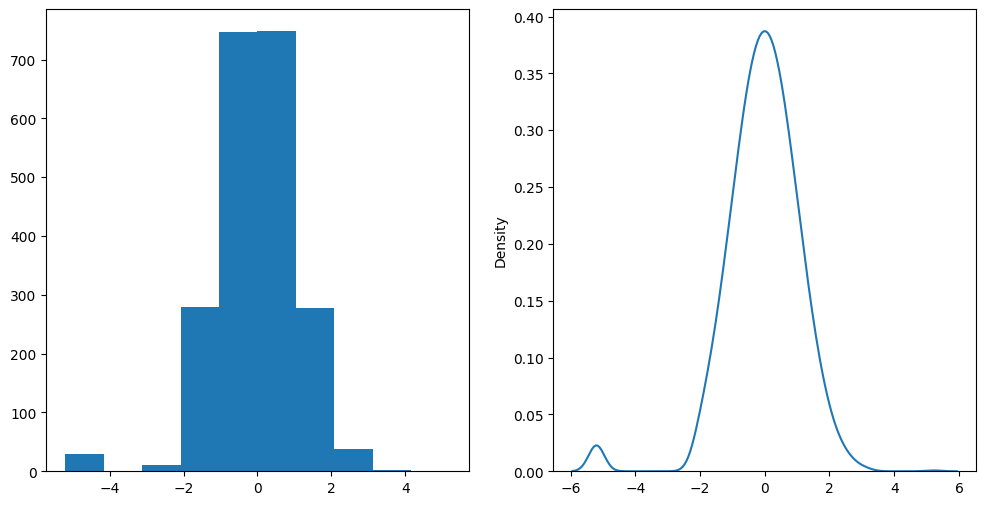

In [17]:
#checking normalized target variable
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(y_tr)

#density curve
plt.subplot(122)
sns.kdeplot(y_tr)
plt.show()

In [18]:
#checking scaled features
scaled_train_x = pd.DataFrame(X_train_sc, columns=drugs.drop('sol_mol_frac', axis=1).columns)
scaled_test_x = pd.DataFrame(X_test_sc, columns=drugs.drop('sol_mol_frac', axis=1).columns)
scaled_x = pd.concat([scaled_train_x, scaled_test_x], axis=0, ignore_index=True)
scaled_x

,temp,press,mw_drug,mp_drug,rho_scco2
0,1.00,-0.247541,-0.361555,0.034732,-0.890883
1,1.00,0.745902,-0.359794,-2.040144,0.025454
2,1.00,0.745902,-1.309808,-0.559314,0.025454
3,1.00,0.909836,0.473923,-0.383401,0.120906
4,-0.50,0.745902,-0.027635,-1.315652,0.750887
...,...,...,...,...,...
2129,-0.75,1.286885,-0.916147,0.396933,1.049969
2130,0.50,0.500000,-0.287050,0.147497,0.127269
2131,0.00,-0.745902,-0.841777,-0.595399,-0.859066
2132,-0.50,0.254098,0.000000,-2.852052,0.528166


### 1. TRAINING SUPPORT VECTOR REGRESSOR (SVR)

In [19]:
svr = SVR(C = 18, epsilon= 0.1, gamma= 1)
svr.fit(X_train_sc, y_train)
svr.predict(X_test_sc)
print("R_squared for training set:", round(svr.score(X_train_sc, y_train),3))#Performance on Training set
print("MSE for training set:", round(mse(y_train, svr.predict(X_train_sc)), 3))
print("R_squared for test set:", round(svr.score(X_test_sc, y_test),3)) #Performance on Test set
print("MSE for test set:", round(mse(y_test, svr.predict(X_test_sc)),3))

R_squared for training set: 0.837
MSE for training set: 0.215
R_squared for test set: 0.69
MSE for test set: 0.383


In [20]:
#cross validation evaluation
from sklearn.model_selection import cross_val_score
svr_cv = -cross_val_score(svr, X_train_sc, y_train, cv=10, scoring = "neg_mean_squared_error")
svr_mse = round(np.mean(svr_cv),3)
svr_std = round(np.std(svr_cv), 3)
print("Cross Validation MSE:", svr_mse)
print("Cross Validation Std:", svr_std)

Cross Validation MSE: 0.427
Cross Validation Std: 0.161


**SVR Performance Diplay**

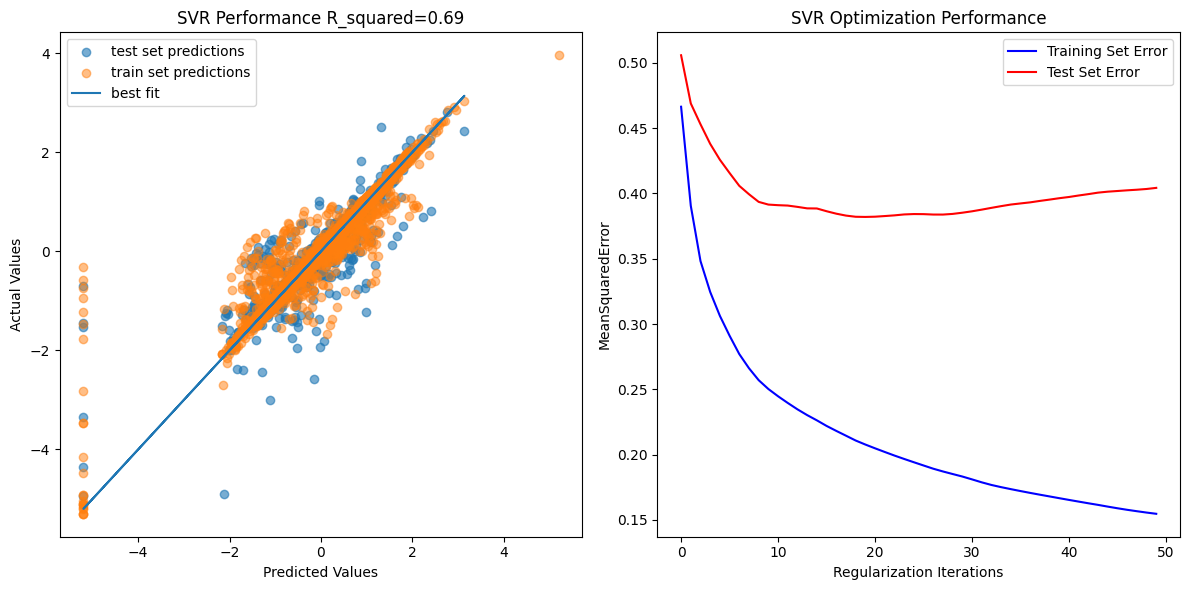

In [21]:
import seaborn as sns

#Plotting Actual Values against Predicted Values
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(x = y_test, y= svr.predict(X_test_sc), alpha = 0.6, label='test set predictions')
plt.scatter(x = y_train, y= svr.predict(X_train_sc), alpha = 0.5, label='train set predictions')
plt.plot(y_test, y_test, label='best fit')
plt.legend()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVR Performance R_squared=' + str(round(svr.score(X_test_sc, y_test),3)))

#Plotting the Optimization Performance
from sklearn.metrics import mean_squared_error as mse
C = 50
train_score = []
test_score = []
for i in range(1,C+1):
    svr = SVR(C=i, epsilon= 0.1, gamma= 1)
    svr.fit(X_train_sc, y_train)
    svr.predict(X_test_sc)
    test_score.append(mse(y_test, svr.predict(X_test_sc)))
    train_score.append(mse(y_train, svr.predict(X_train_sc)))
plt.subplot(122)
plt.plot(np.arange(C), train_score, "b-", label="Training Set Error")
plt.plot(np.arange(C), test_score, "r-", label= "Test Set Error")
plt.xlabel("Regularization Iterations")
plt.ylabel("MeanSquaredError")
plt.title("SVR Optimization Performance")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


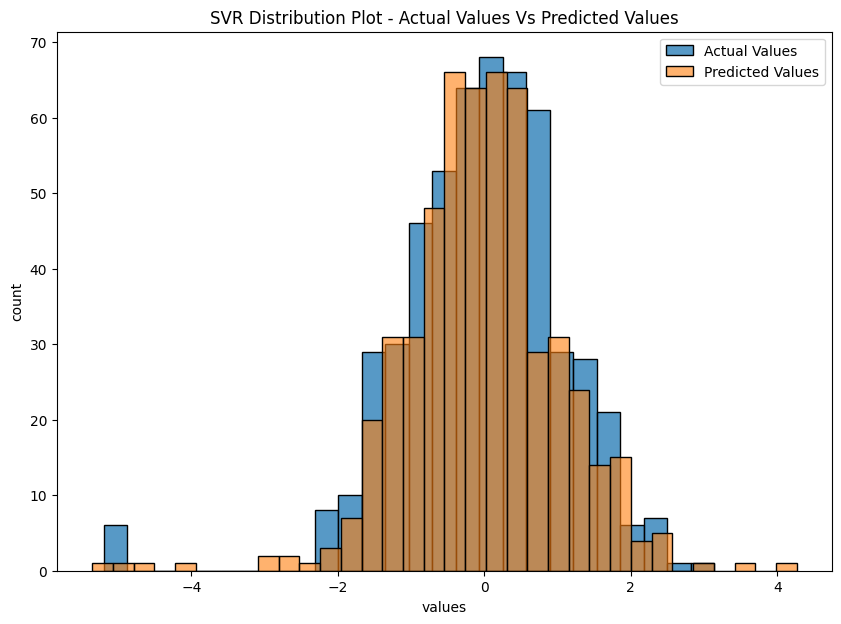

In [22]:
#Display of Actual and Predicted Values distributions
plt.figure(figsize=(10,7))
sns.histplot(y_test, label="Actual Values")
sns.histplot(svr.predict(X_test_sc), alpha=0.6, label="Predicted Values")
plt.legend()
plt.ylabel("count")
plt.xlabel("values")
plt.title("SVR Distribution Plot - Actual Values Vs Predicted Values")
plt.show()

### 2. TRAINING RANDOM FOREST REGRESSOR (RFR)

In [23]:
rfr = RandomForestRegressor(n_estimators=12, random_state=42)
rfr.fit(X_train_sc, y_train)
rfr.predict(X_test_sc)
print("R_squared for training set:", round(rfr.score(X_train_sc, y_train),3))#Performance on Training set
print("MSE for training set:", round(mse(y_train, rfr.predict(X_train_sc)),3))
print("R_squared for test set:", round(rfr.score(X_test_sc, y_test),3)) #Performance on Test set
print("MSE for test set:", round(mse(y_test, rfr.predict(X_test_sc)),3))

R_squared for training set: 0.985
MSE for training set: 0.019
R_squared for test set: 0.972
MSE for test set: 0.035


In [24]:
#Evaluating Performance with Cross Validation
rfr_cv = -cross_val_score(rfr, X_train_sc, y_train, cv=10, scoring = "neg_mean_squared_error")
rfr_mse = round(np.mean(rfr_cv),3)
rfr_std = round(np.std(rfr_cv), 3)
print("Cross Validation MSE:", rfr_mse)
print("Cross Validation Std:", rfr_std)

Cross Validation MSE: 0.14
Cross Validation Std: 0.095


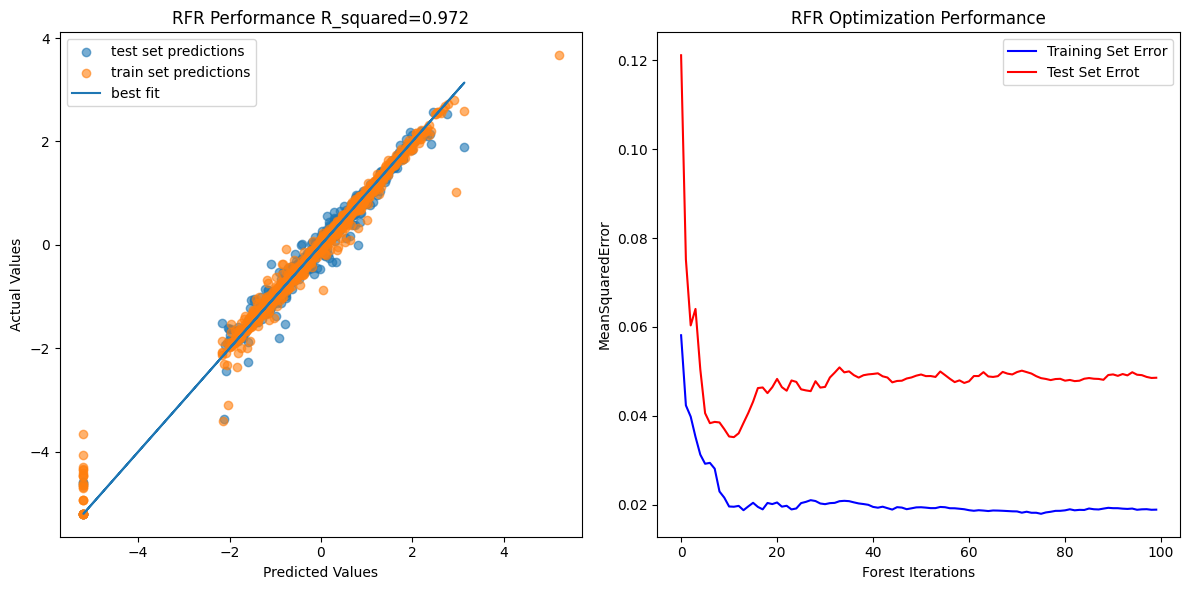

In [25]:
#Plotting Actual Values against Predicted Values
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(x = y_test, y= rfr.predict(X_test_sc), alpha = 0.6, label='test set predictions')
plt.scatter(x = y_train, y= rfr.predict(X_train_sc), alpha = 0.6, label='train set predictions')
plt.plot(y_test, y_test, label='best fit')
plt.legend()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('RFR Performance R_squared=' + str(round(rfr.score(X_test_sc, y_test),3)))

#Ploting Optimization Performance
n_estimators= 100
train_score = []
test_score = []
for i in range(1,n_estimators+1):
    rfr = RandomForestRegressor(n_estimators=i, random_state=42)
    rfr.fit(X_train_sc, y_train)
    rfr.predict(X_test_sc)
    test_score.append(mse(y_test, rfr.predict(X_test_sc)))
    train_score.append(mse(y_train, rfr.predict(X_train_sc)))
plt.subplot(1,2,2)
plt.plot(np.arange(n_estimators), train_score, "b-", label="Training Set Error")
plt.plot(np.arange(n_estimators), test_score, "r-", label= "Test Set Errot")
plt.xlabel("Forest Iterations")
plt.ylabel("MeanSquaredError")
plt.title("RFR Optimization Performance")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


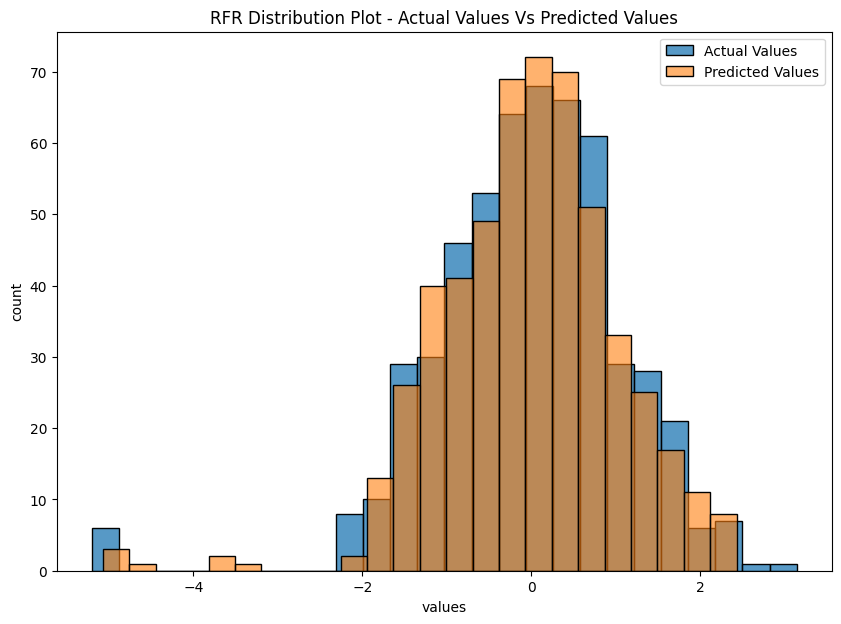

In [26]:
#Display of Actual and Predicted Values distributions
plt.figure(figsize=(10,7))
sns.histplot(y_test, label="Actual Values")
sns.histplot(rfr.predict(X_test_sc), alpha=0.6, label="Predicted Values")
plt.legend()
plt.ylabel("count")
plt.xlabel("values")
plt.title("RFR Distribution Plot - Actual Values Vs Predicted Values")
plt.show()

### 3. TRAINING GRADIENT BOOSTING REGRESSOR (GBR)

In [27]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_sc, y_train)
gbr.predict(X_test_sc)
print(gbr.score(X_train_sc, y_train))
print(gbr.score(X_test_sc, y_test))

0.892324205164645
0.8811130668940254


In [28]:
gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, min_samples_leaf=1, 
                                min_samples_split=5, n_estimators=300, subsample=1.0)
gbr.fit(X_train_sc, y_train)
gbr.predict(X_test_sc)
print("R_squared for training set:", round(gbr.score(X_train_sc, y_train),3))#Performance on Training set
print("MSE for training set:", round(mse(y_train, gbr.predict(X_train_sc)),3))
print("R_squared for test set:", round(gbr.score(X_test_sc, y_test),3)) #Performance on Test set
print("MSE for test set:", round(mse(y_test, gbr.predict(X_test_sc)),3))

R_squared for training set: 0.997
MSE for training set: 0.004
R_squared for test set: 0.965
MSE for test set: 0.044


In [29]:
#Evaluating Performance with Cross Validation
gbr_cv = -cross_val_score(gbr, X_train_sc, y_train, cv=10, scoring = "neg_mean_squared_error")
gbr_mse = round(np.mean(rfr_cv),3)
gbr_std = round(np.std(rfr_cv), 3)
print("Cross Validation MSE:", gbr_mse)
print("Cross Validation Std:", gbr_std)

Cross Validation MSE: 0.14
Cross Validation Std: 0.095


**GBR Performance Display**

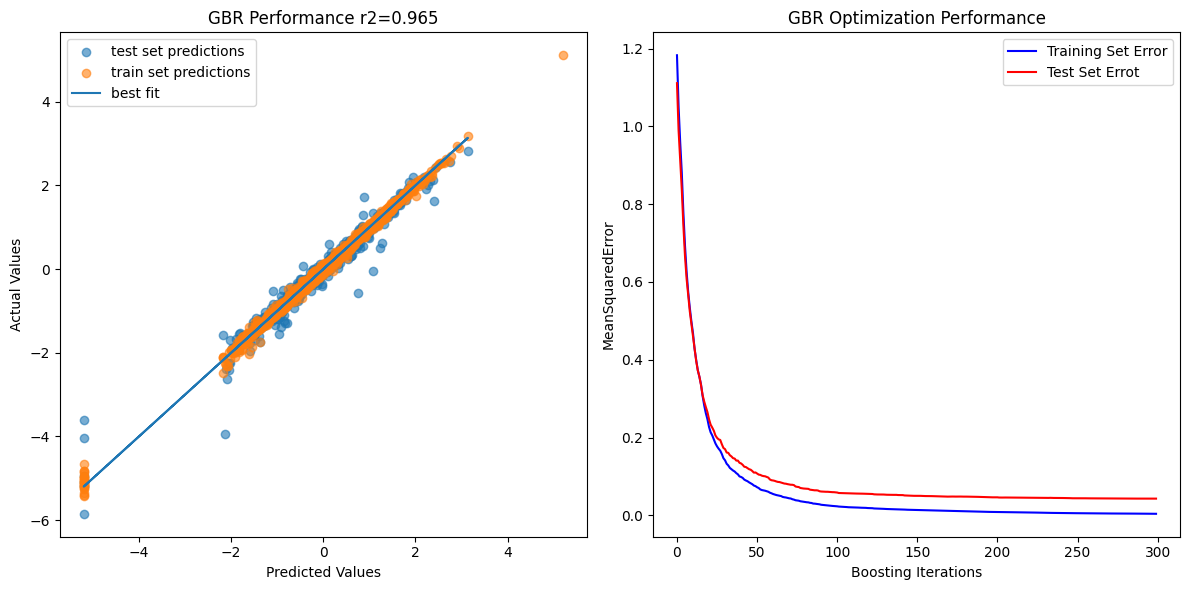

In [30]:
#Plotting Actual Values against Predicted Values
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(x = y_test, y= gbr.predict(X_test_sc), alpha = 0.6, label='test set predictions')
plt.scatter(x = y_train, y= gbr.predict(X_train_sc), alpha = 0.6, label='train set predictions')
plt.plot(y_test, y_test, label='best fit')
plt.legend()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('GBR Performance r2=' + str(round(gbr.score(X_test_sc, y_test),3)))


#Plotting Optimization Performance
n_estimators=300
train_score = []
test_score = []
for i in range(1,n_estimators+1):
    params = {'learning_rate' : 0.1, 'max_depth' : 5, 'min_samples_leaf' :1, 
                                'min_samples_split' : 5, 'n_estimators' : i, 'subsample' :1.0}
    gbr = GradientBoostingRegressor(**params, random_state=42)
    gbr.fit(X_train_sc, y_train)
    y_pred = gbr.predict(X_test_sc)
    test_score.append(mse(y_test, gbr.predict(X_test_sc)))
    train_score.append(mse(y_train, gbr.predict(X_train_sc)))
plt.subplot(1,2,2)
plt.plot(np.arange(n_estimators), train_score, "b-", label="Training Set Error")
plt.plot(np.arange(n_estimators), test_score, "r-", label= "Test Set Errot")
plt.xlabel("Boosting Iterations")
plt.ylabel("MeanSquaredError")
plt.title("GBR Optimization Performance")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


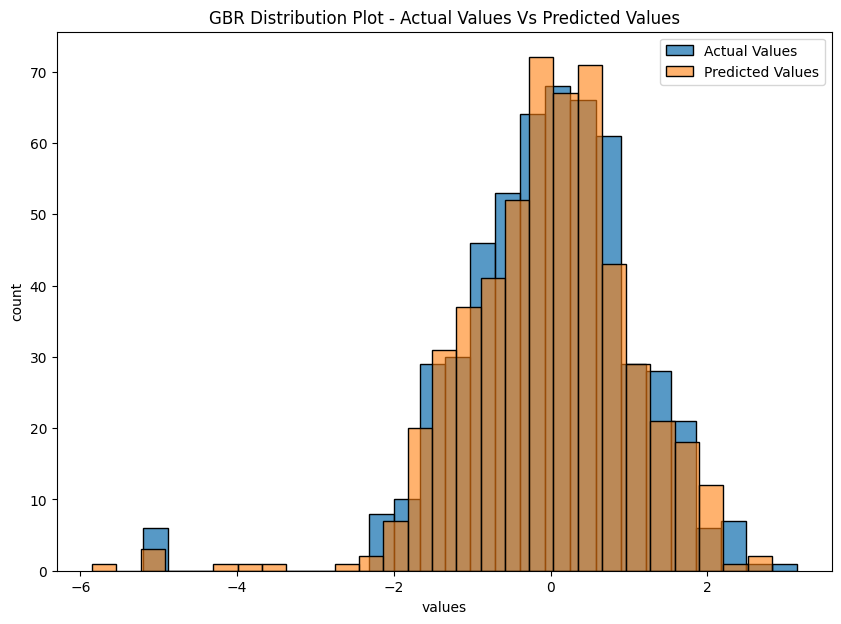

In [31]:
#Display of Actual and Predicted Values distributions
plt.figure(figsize=(10,7))
sns.histplot(y_test, label="Actual Values")
sns.histplot(gbr.predict(X_test_sc), alpha=0.6, label="Predicted Values")
plt.legend()
plt.ylabel("count")
plt.xlabel("values")
plt.title("GBR Distribution Plot - Actual Values Vs Predicted Values")
plt.show()

### 4. TRAINING DECISION TREE REGRESSOR (DTR)

In [32]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
dtr = DecisionTreeRegressor(**param_grid, random_state=42)
dtr.fit(X_train_sc, y_train)
dtr.predict(X_test_sc)
print("R_squared for training set:", round(dtr.score(X_train_sc, y_train),3))#Performance on Training set
print("MSE for training set:", round(mse(y_train, dtr.predict(X_train_sc)),3))
print("R_squared for test set:", round(dtr.score(X_test_sc, y_test),3)) #Performance on Test set
print("MSE for test set:", round(mse(y_test, dtr.predict(X_test_sc)),3))

R_squared for training set: 0.983
MSE for training set: 0.023
R_squared for test set: 0.945
MSE for test set: 0.068


In [33]:
#Evaluating Performance with Cross Validation
dtr_cv = -cross_val_score(dtr, X_train_sc, y_train, cv=5, scoring = "neg_mean_squared_error")
dtr_mse = round(np.mean(dtr_cv),3)
dtr_std = round(np.std(dtr_cv), 3)
print("Cross Validation MSE:", dtr_mse)
print("Cross Validation Std:", dtr_std)

Cross Validation MSE: 0.179
Cross Validation Std: 0.061


**DTR Performance Display**

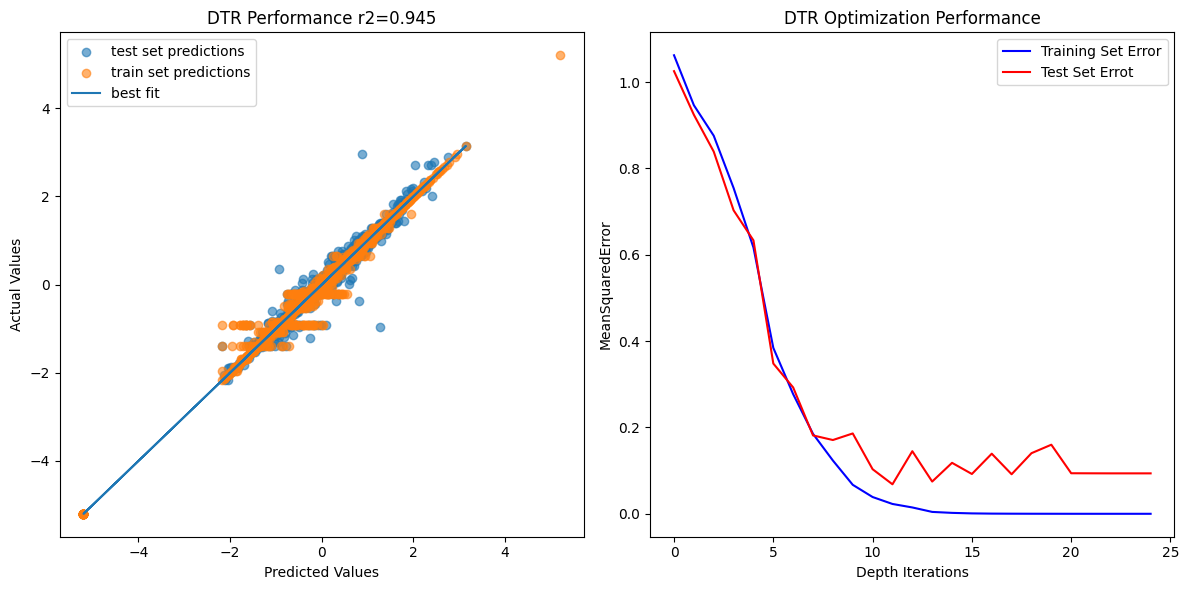

In [34]:
#Plotting Actual Values against Predicted Values
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(x = y_test, y= dtr.predict(X_test_sc), alpha = 0.6, label='test set predictions')
plt.scatter(x = y_train, y= dtr.predict(X_train_sc), alpha = 0.6, label='train set predictions')
plt.plot(y_test, y_test, label='best fit')
plt.legend()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('DTR Performance r2=' + str(round(dtr.score(X_test_sc, y_test),3)))

#Plotting Optimization Performance
max_depth= 25
train_score = []
test_score = []
for i in range(1,max_depth+1):
    param_grid = {'max_depth': i, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
    dtr = DecisionTreeRegressor(**param_grid, random_state=42)
    dtr.fit(X_train_sc, y_train)
    dtr.predict(X_test_sc)
    test_score.append(mse(y_test, dtr.predict(X_test_sc)))
    train_score.append(mse(y_train, dtr.predict(X_train_sc)))
plt.subplot(1,2,2)
plt.plot(np.arange(max_depth), train_score, "b-", label="Training Set Error")
plt.plot(np.arange(max_depth), test_score, "r-", label= "Test Set Errot")
plt.xlabel("Depth Iterations")
plt.ylabel("MeanSquaredError")
plt.title("DTR Optimization Performance")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


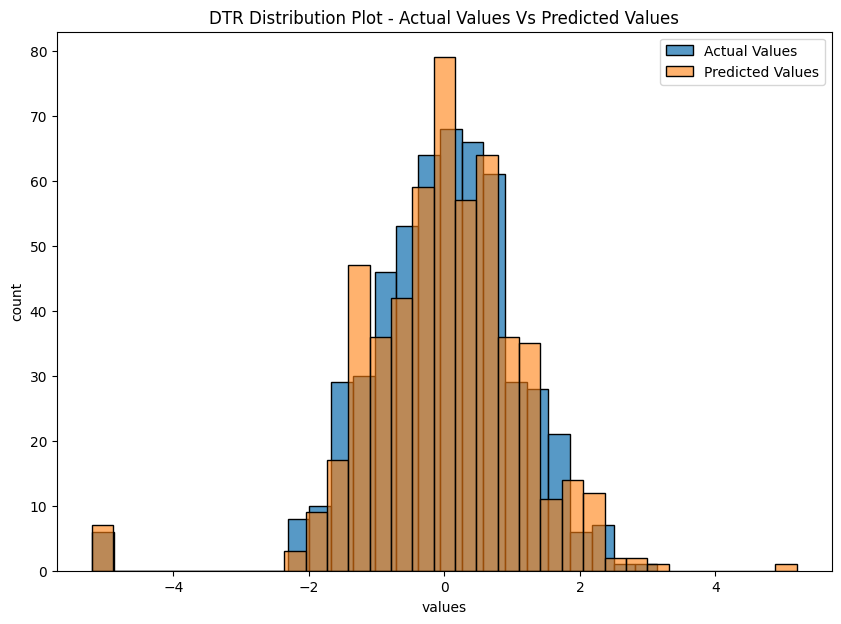

In [35]:
#Display of Actual and Predicted Values distributions
plt.figure(figsize=(10,7))
sns.histplot(y_test, label="Actual Values")
sns.histplot(dtr.predict(X_test_sc), alpha=0.6, label="Predicted Values")
plt.legend()
plt.ylabel("count")
plt.xlabel("values")
plt.title("DTR Distribution Plot - Actual Values Vs Predicted Values")
plt.show()

### 5. TRAINING K-NEAREST NEIGHBOR REGRESSOR (KNNR)

In [36]:
#Fitting
knnr = KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')
knnr.fit(X_train_sc, y_train)
knnr.predict(X_test_sc)
print("R_squared for training set:", round(knnr.score(X_train_sc, y_train),3))#Performance on Training set
print("MSE for training set:", round(mse(y_train, knnr.predict(X_train_sc)),3))
print("R_squared for test set:", round(knnr.score(X_test_sc, y_test),3)) #Performance on Test set
print("MSE for test set:", round(mse(y_test, knnr.predict(X_test_sc)),3))

R_squared for training set: 1.0
MSE for training set: 0.0
R_squared for test set: 0.739
MSE for test set: 0.323


In [37]:
#Evaluating Performance with Cross Validation
knnr_cv = -cross_val_score(knnr, X_train_sc, y_train, cv=5, scoring = "neg_mean_squared_error")
knnr_mse = round(np.mean(knnr_cv),3)
knnr_std = round(np.std(knnr_cv), 3)
print("Cross Validation MSE:", knnr_mse)
print("Cross Validation Std:", knnr_std)

Cross Validation MSE: 0.479
Cross Validation Std: 0.127


**KNNR Performance Display**

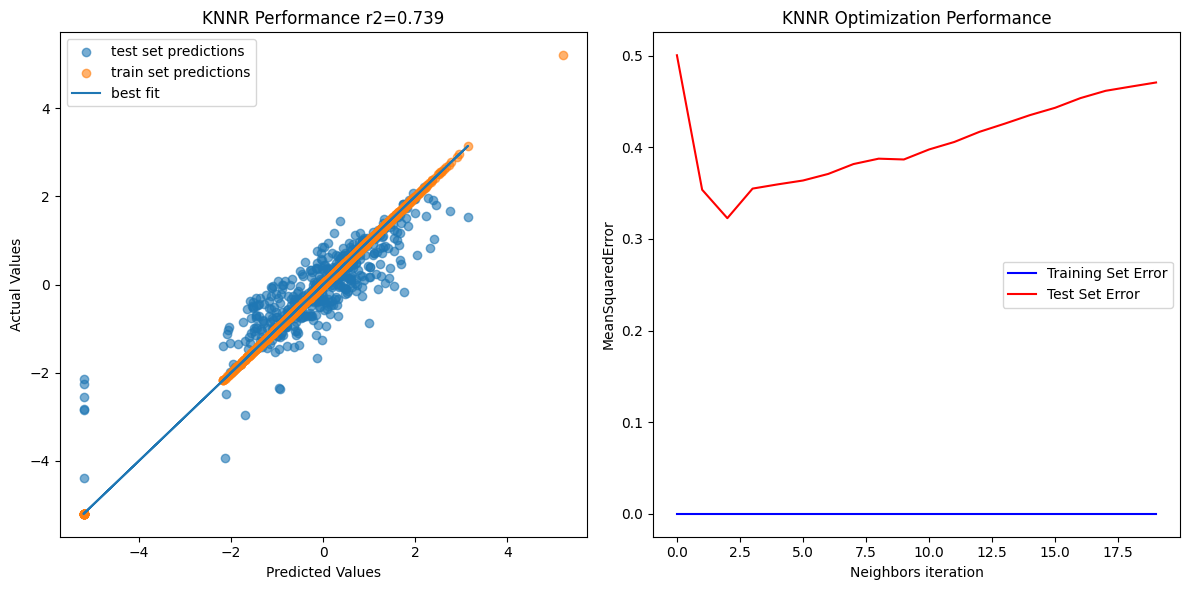

In [38]:
#Plotting Actual Values against Predicted Values
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(x = y_test, y= knnr.predict(X_test_sc), alpha = 0.6, label='test set predictions')
plt.scatter(x = y_train, y= knnr.predict(X_train_sc), alpha = 0.6, label='train set predictions')
plt.plot(y_test, y_test, label='best fit')
plt.legend()
plt.tight_layout()
plt.legend()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('KNNR Performance r2=' + str(round(knnr.score(X_test_sc, y_test),3)))

#Plotting Optimization Performance
n_neighbors = 20
train_score = []
test_score = []
for i in range(1,n_neighbors+1):
    knnr = KNeighborsRegressor(n_neighbors=i, p=1, weights='distance')
    knnr.fit(X_train_sc, y_train)
    knnr.predict(X_test_sc)
    train_score.append(mse(y_train, knnr.predict(X_train_sc)))
    test_score.append(mse(y_test, knnr.predict(X_test_sc)))
plt.subplot(122)
plt.plot(np.arange(n_neighbors), train_score, "b-", label="Training Set Error")
plt.plot(np.arange(n_neighbors), test_score, "r-", label="Test Set Error")
plt.title("KNNR Optimization Performance")
plt.xlabel("Neighbors iteration")
plt.ylabel("MeanSquaredError")
plt.legend()
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


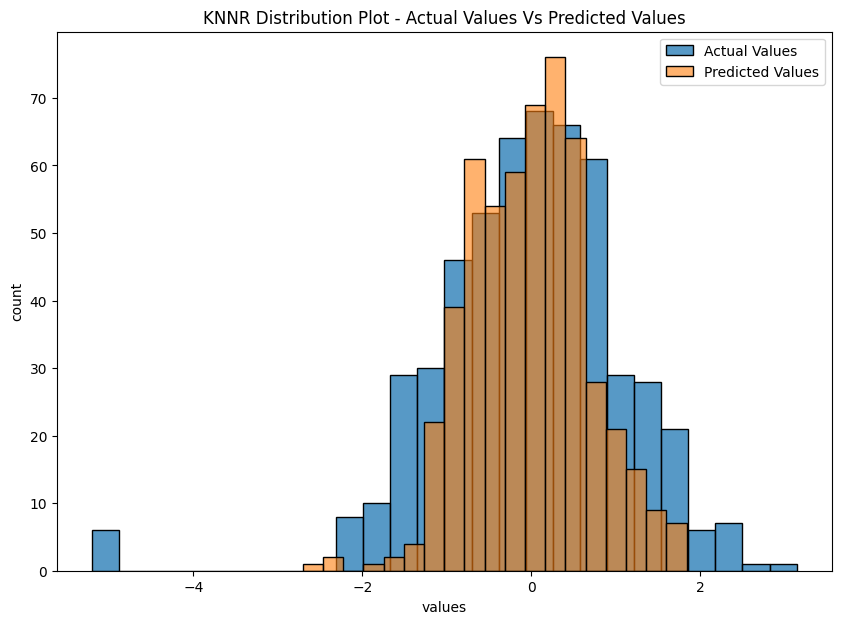

In [39]:
#Display of Actual and Predicted Values distributions
plt.figure(figsize=(10,7))
sns.histplot(y_test, label="Actual Values")
sns.histplot(knnr.predict(X_test_sc), alpha=0.6, label="Predicted Values")
plt.legend()
plt.ylabel("count")
plt.xlabel("values")
plt.title("KNNR Distribution Plot - Actual Values Vs Predicted Values")
plt.show()

## Model Comparison

In [40]:
# R-squared for all models
from sklearn.metrics import r2_score
r_square = {'model': ['Decision Tree Regressor (DTR)', 'RandomForest Regressor (RFR)', 'Gradient Boosting Regressor (GBR)', 
                         'Support Vector Regressor (SVR)', 'K-Nearest Neighbor Regressor (KNNR)'],
               'R2_score (training)': [dtr.score(X_train_sc, y_train), rfr.score(X_train_sc, y_train), gbr.score(X_train_sc, y_train), 
                                       svr.score(X_train_sc, y_train), knnr.score(X_train_sc, y_train)],
              'R2_score (test)': [dtr.score(X_test_sc, y_test), rfr.score(X_test_sc, y_test), gbr.score(X_test_sc, y_test), 
                                  svr.score(X_test_sc, y_test), knnr.score(X_test_sc, y_test)]}
r_square = pd.DataFrame(r_square)
r_square

,model,R2_score (training),R2_score (test)
0,Decision Tree Regressor (DTR),1.000000,0.924121
1,RandomForest Regressor (RFR),0.985677,0.960674
2,Gradient Boosting Regressor (GBR),0.996867,0.965059
3,Support Vector Regressor (SVR),0.882409,0.672472
4,K-Nearest Neighbor Regressor (KNNR),1.000000,0.618606


In [41]:
#Abbreviating model names
r_square['model'] = ['DTR', 'RFR', 'GBR', 'SVR', 'KNNR']

#ordering test score
r_square1 = r_square.sort_values('R2_score (test)')
r_square1

,model,R2_score (training),R2_score (test)
4,KNNR,1.000000,0.618606
3,SVR,0.882409,0.672472
0,DTR,1.000000,0.924121
1,RFR,0.985677,0.960674
2,GBR,0.996867,0.965059


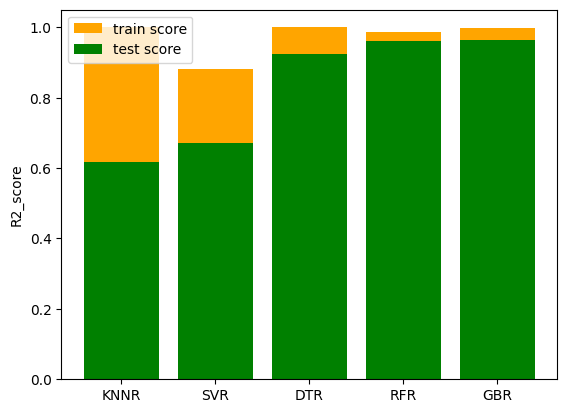

In [42]:
plt.bar(r_square1['model'], r_square1['R2_score (training)'], label='train score', color='orange')
plt.bar(r_square1['model'], r_square1['R2_score (test)'], label='test score', color='green')
plt.ylabel('R2_score')
plt.legend(loc='best')
plt.ylim()
plt.show()

In [43]:
# MSE for all models
error = {'model': ['Decision Tree Regressor (DTR)', 'RandomForest Regressor (RFR)', 'Gradient Boosting Regressor (GBR)', 
                         'Support Vector Regressor (SVR)', 'K-Nearest Neighbor Regressor (KNNR)'],
               'MSE train': [round(mse(y_train, dtr.predict(X_train_sc)),3), round(mse(y_train, rfr.predict(X_train_sc)),3), 
                       round(mse(y_train, gbr.predict(X_train_sc)),3), round(mse(y_train, svr.predict(X_train_sc)),3),
                       round(mse(y_train, knnr.predict(X_train_sc)),3)],
        'MSE test': [round(mse(y_test, dtr.predict(X_test_sc)),3), round(mse(y_test, rfr.predict(X_test_sc)),3), 
                       round(mse(y_test, gbr.predict(X_test_sc)),3), round(mse(y_test, svr.predict(X_test_sc)),3),
                       round(mse(y_test, knnr.predict(X_test_sc)),3)]}
error = pd.DataFrame(error)
error

,model,MSE train,MSE test
0,Decision Tree Regressor (DTR),0.000,0.094
1,RandomForest Regressor (RFR),0.019,0.049
2,Gradient Boosting Regressor (GBR),0.004,0.043
3,Support Vector Regressor (SVR),0.155,0.404
4,K-Nearest Neighbor Regressor (KNNR),0.000,0.471


In [44]:
#Error with model names abbreviated
error['model'] = ['DTR', 'RFR', 'GBR', 'SVR', 'KNNR']

#ordering by test error
error1 = error.sort_values('MSE test')
error1

,model,MSE train,MSE test
2,GBR,0.004,0.043
1,RFR,0.019,0.049
0,DTR,0.000,0.094
3,SVR,0.155,0.404
4,KNNR,0.000,0.471


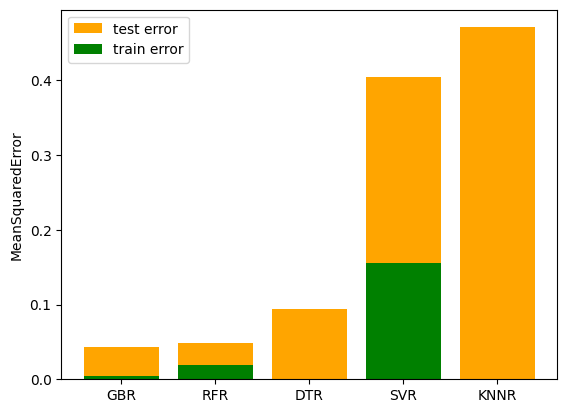

In [45]:
plt.bar(error1['model'], error1['MSE test'], label='test error', color='orange')
plt.bar(error1['model'], error1['MSE train'], label='train error', color='green')
plt.ylabel('MeanSquaredError')
plt.legend(loc='best')
plt.show()

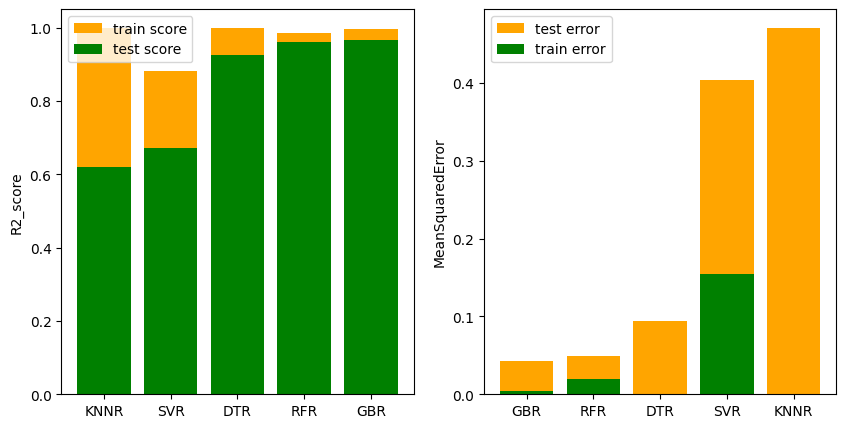

In [46]:
#Viewing score and error side by side
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(r_square1['model'], r_square1['R2_score (training)'], label='train score', color='orange')
plt.bar(r_square1['model'], r_square1['R2_score (test)'], label='test score', color='green')
plt.ylabel('R2_score')
plt.legend(loc='best')
plt.ylim()
plt.subplot(122)
plt.bar(error1['model'], error1['MSE test'], label='test error', color='orange')
plt.bar(error1['model'], error1['MSE train'], label='train error', color='green')
plt.ylabel('MeanSquaredError')
plt.legend(loc='best')
plt.show()

## Cross Validation Evaluation of Models

In [47]:
#Cross validation Error and Deviation
cv = {'model': ['Decision Tree Regressor (DTR)', 'RandomForest Regressor (RFR)', 'Gradient Boosting Regressor (GBR)', 
                         'Support Vector Regressor (SVR)', 'K-Nearest Neighbor Regressor (KNNR)'],
               'CV MSE': [dtr_mse, rfr_mse, gbr_mse, svr_mse, knnr_mse],
              'CV Std': [dtr_std, rfr_std, gbr_std, svr_std, knnr_std]}
cv = pd.DataFrame(cv)
cv

,model,CV MSE,CV Std
0,Decision Tree Regressor (DTR),0.179,0.061
1,RandomForest Regressor (RFR),0.140,0.095
2,Gradient Boosting Regressor (GBR),0.140,0.095
3,Support Vector Regressor (SVR),0.427,0.161
4,K-Nearest Neighbor Regressor (KNNR),0.479,0.127


In [48]:
#Abbreviating model names
cv['model'] = ['DTR', 'RFR', 'GBR', 'SVR', 'KNNR']
cv

,model,CV MSE,CV Std
0,DTR,0.179,0.061
1,RFR,0.140,0.095
2,GBR,0.140,0.095
3,SVR,0.427,0.161
4,KNNR,0.479,0.127


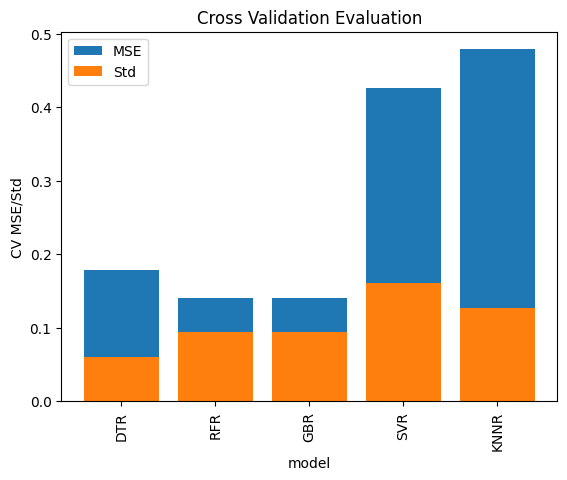

In [49]:
plt.bar(cv['model'],cv['CV MSE'], label='MSE')
plt.bar(cv['model'],cv['CV Std'], label='Std')
plt.xticks(rotation=90)
plt.ylabel('CV MSE/Std')
plt.title('Cross Validation Evaluation')
plt.xlabel('model')
plt.legend()
plt.show()

## Commentary

**Overall modelling outcome:**
* The ensemble regressors (i.e regressors built on tree architecture) which are Decision Tree Regressor, the Random Forest Regressor and the Gradient Boosting Regressor perform the best by greatly avoiding overfitting despite the limited data available.

* However, Support Vector Regressor and the K-Nearest Neighbor Regressor perform quite woefully with high proneness to overfitting.

* ANN also shows proneness to overfitting. Of course this is a peculiar hiccup with ann in the presence of limited data.

**Insight:** Specifically, the ensemble models prove to be highly robust and effective for predictive optimization for the essence of achieving data-driven drug dissolution in pharmaceutical production of drugs over a diversified range of therapeutic classes.

### 6. TRAINING ANN MODEL

In [50]:
#Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score

In [51]:
#Training Model
tf.random.set_seed(42)
np.random.seed(42)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_sc.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test),
                   epochs=210, batch_size=32, verbose=1)
y_pred = model.predict(X_test_sc)
print(r2_score(y_test, y_pred))

Epoch 1/210


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1221 - val_loss: 1.0394
Epoch 2/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9400 - val_loss: 0.9374
Epoch 3/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8555 - val_loss: 0.8884
Epoch 4/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8148 - val_loss: 0.8527
Epoch 5/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7878 - val_loss: 0.8236
Epoch 6/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7636 - val_loss: 0.7955
Epoch 7/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7415 - val_loss: 0.7690
Epoch 8/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7201 - val_loss: 0.7445
Epoch 9/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7004 - val_loss: 0.7209
Epoch 10/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6805 - val_loss: 0.6987
Epoch 11/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6615 - val_loss: 0.6807
Epoch 12/210
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6432 - val_lo

In [52]:
y_train_pred = model.predict(X_train_sc)
print(r2_score(y_train, y_train_pred))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.8898440260809846


**ANN Performance Display**

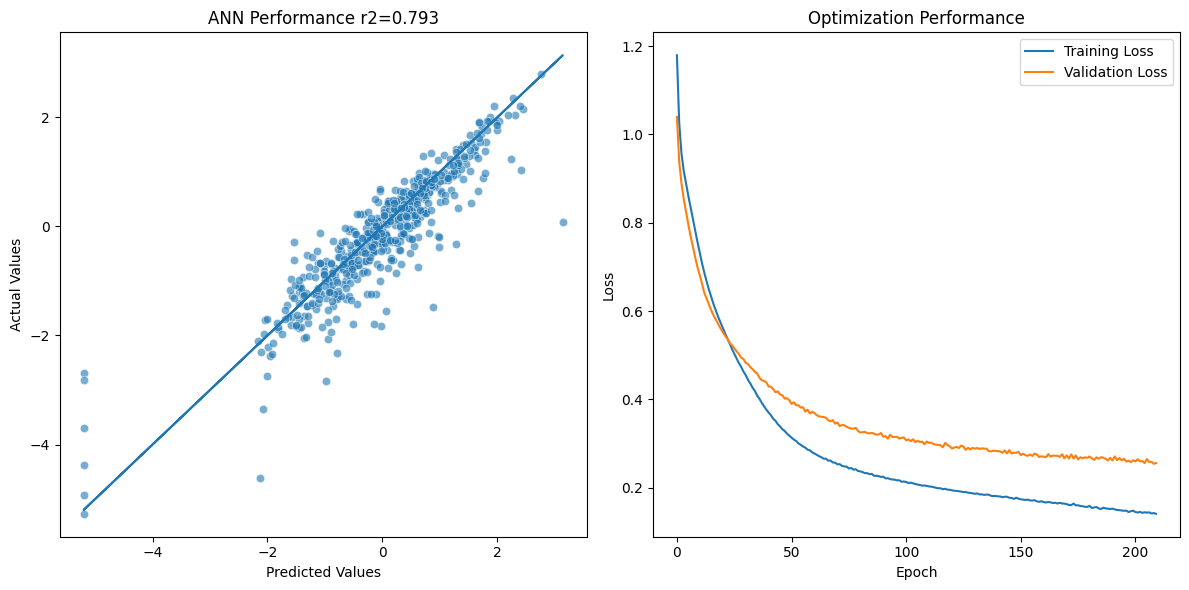

In [53]:
#Plotting Actual Values against Predicted Values
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(x = y_test, y= y_pred.flatten(), alpha = 0.6)
plt.plot(y_test, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('ANN Performance r2=' + str(round(r2_score(y_test, y_pred),3)))

#Plotting Optimizationo Performance
plt.subplot(122)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Optimization Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


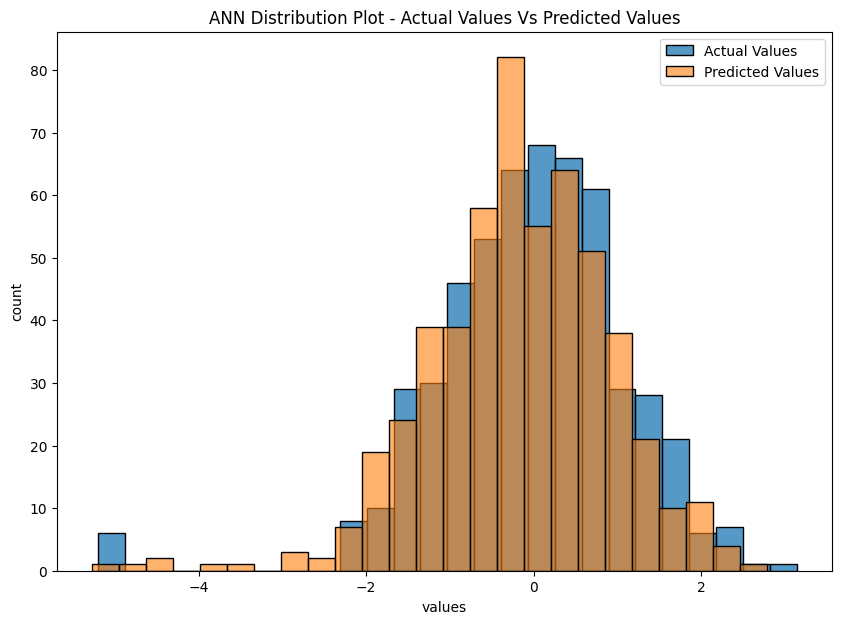

In [54]:
#Display of Actual and Predicted Values distributions
plt.figure(figsize=(10,7))
sns.histplot(y_test, label="Actual Values")
sns.histplot(y_pred.flatten(), alpha=0.6, label="Predicted Values")
plt.legend()
plt.ylabel("count")
plt.xlabel("values")
plt.title("ANN Distribution Plot - Actual Values Vs Predicted Values")
plt.show()

ANN is also proves proneness to overfitting. Of course this is a peculiar hiccup with ann in the presence of limited data.